In [ ]:
"""
Script: extract_per_sol_tau.py

Purpose
-------
Reads optical depth (tau) measurements, averages tau values per integer
Martian Sol (day), and prints the resulting per-sol mean tau array.
This array is used as input for downstream dust concentration
calculations and contextual analysis in the associated ASCE manuscript.

Environment
-----------
Designed to run in Google Colab, Jupyter Notebook, or any standard
Python environment with:
  - pandas

Input Format
------------
Expected columns (no header in raw data):
  id, sol, Ls, tau, sigma

Output
------
Prints:
  - One-line Python list of per-sol mean tau values
"""

import pandas as pd
from io import StringIO


# ============================================================
# 1) Paste raw data below (no header row)
# ============================================================
DATA_TXT = """\
"""  # <-- Paste rows here


# ============================================================
# 2) Load data
# ============================================================
df = pd.read_csv(
    StringIO(DATA_TXT),
    header=None,
    names=["id", "sol", "Ls", "tau", "sigma"]
)

# Convert to numeric (invalid entries become NaN)
df["sol"] = pd.to_numeric(df["sol"], errors="coerce")
df["tau"] = pd.to_numeric(df["tau"], errors="coerce")

# Drop rows with missing required values
df = df.dropna(subset=["sol", "tau"])


# ============================================================
# 3) Average tau per integer Sol
# ============================================================
df["sol_int"] = df["sol"].astype(int)

avg = (
    df.groupby("sol_int", as_index=False)["tau"]
      .mean()
)

# ============================================================
# 4) Extract tau array (rounded for reporting)
# ============================================================
tau_values = avg["tau"].round(3).tolist()


# ============================================================
# 5) Output
# ============================================================
print("tau =", tau_values)

tau = [0.678, 0.746, 0.667, 0.68, 0.766, 0.645, 0.685, 0.659, 0.674, 0.59, 0.758, 1.13, 1.084, 1.09, 0.996, 1.038, 1.132, 1.072, 0.984, 1.024, 0.992, 0.992, 1.073, 1.057, 1.037, 1.003, 0.984, 0.916, 0.83, 0.837, 0.7, 0.668, 0.954, 1.07, 1.04, 0.95, 0.924, 0.968, 0.903, 0.874, 0.934, 0.82, 0.771, 0.737, 0.652, 0.683, 0.764, 0.762, 0.824, 0.843, 0.769, 0.765, 0.659, 0.437, 0.463, 0.452, 0.48, 0.471, 0.461, 0.481, 0.45, 0.477, 0.464, 0.447, 0.505, 0.449, 0.469, 0.457, 0.492, 0.496, 0.473, 0.43, 0.461, 0.461, 0.426, 0.415, 0.367, 0.422, 0.401, 0.374, 0.369, 0.443, 0.401, 0.386, 0.401, 0.418, 0.447, 0.508, 0.604, 0.703, 0.832, 0.676, 0.637, 0.735, 0.789, 0.76, 0.81, 0.825, 0.706, 0.728, 0.671, 0.71, 0.681, 0.742, 0.734, 0.703, 0.688, 0.821, 0.866, 0.868, 1.019, 1.282, 1.294, 1.324, 1.375, 1.42, 1.364, 1.36, 1.378, 1.326, 1.423, 1.356, 1.214, 1.188, 1.297, 1.229, 0.942, 1.049, 1.038, 1.015, 1.36, 0.934, 0.883, 0.921, 0.912, 0.813, 0.993, 0.827, 0.707, 0.784, 0.787, 0.695, 0.899, 0.752, 0.815

In [ ]:
"""
Script: tau_to_dust_concentration.py

Purpose
-------
Converts a time series of per-sol atmospheric optical depth values (tau)
into an estimated dust mass concentration (mg/m^3) using a two-point
linear calibration. This mapping is used to contextualize Martian dust
loading conditions in the associated ASCE journal manuscript.

Environment
-----------
Designed for Google Colab, Jupyter Notebook, or any standard Python
environment with NumPy installed.

Method
------
A linear relation of the form:
    C = k * tau + b
is defined using two anchor points representing nominal ambient and
storm dust conditions. The calibration is then applied to the full
tau time series.

Output
------
Prints:
- calibration equation
- mean dust concentration
- 75th percentile dust concentration
- full mapped concentration array (optional)
"""

import numpy as np


# ============================================================
# 1) Input: per-sol optical depth (tau) values
#    These values are averaged per Sol and derived from
#    Mastcam-Z optical depth measurements.
# ============================================================
tau = []

# ============================================================
# 2) Two-point calibration definition
#    C = k * tau + b
# ============================================================

# Ambient (clear-sky) reference
tau_ambient = 0.35
C_ambient_mg = 1.0     # mg/m^3

# Storm-like reference
tau_storm = 1.10
C_storm_mg = 10.0      # mg/m^3

# ============================================================
# 4) Compute linear calibration coefficients
# ============================================================
if abs(tau_storm - tau_ambient) < 1e-9:
    raise ValueError("Calibration tau values must be distinct.")

k = (C_storm_mg - C_ambient_mg) / (tau_storm - tau_ambient)
b = C_ambient_mg - k * tau_ambient


# ============================================================
# 5) Map tau values to dust concentration
# ============================================================
tau_array = np.array(tau, dtype=float)
C_mg = k * tau_array + b


# ============================================================
# 6) Summary statistics
# ============================================================
mean_C = float(np.mean(C_mg))
p75_C = float(np.percentile(C_mg, 75))


# ============================================================
# 7) Output
# ============================================================
print(f"Linear calibration: C = {k:.3f} * tau + {b:.3f}  [mg/m^3]")
print(f"Mean dust concentration:        {mean_C:.3f} mg/m^3")
print(f"75th percentile concentration:  {p75_C:.3f} mg/m^3")

Linear calibration: C = 12.000 * tau + -3.200   [mg/m^3]
Mean concentration:        4.296 mg/m^3
75th percentile (P75):     6.142 mg/m^3
C_mg = [2.248, 2.296, 2.68, 1.984, 1.984, 1.312, 1.024, 2.164, 1.852, 2.596, 3.22, 2.536, 1.996, 1.528, 2.104, 1.564, 1.78, 1.372, 1.66, 2.884, 1.408, 1.408, 1.72, 2.116, 2.032, 1.948, 2.152, 1.108, 1.3, 1.324, 1.792, 1.864, 1.96, 2.164, 1.636, 1.708, 1.336, 1.396, 2.056, 1.924, 1.612, 1.312, 1.576, 2.212, 1.672, 2.008, 1.468, 1.804, 1.324, 1.216, 1.816, 1.48, 1.528, 2.392, 1.312, 1.648, 2.068, 1.324, 1.48, 1.552, 1.948, 1.624, 1.348, 2.224, 1.936, 2.248, 1.0, 1.24, 1.744, 1.444, 1.588, 1.552, 1.804, 2.716, 2.008, 2.032, 2.416, 1.648, 1.636, 1.444, 2.32, 1.528, 1.636, 0.88, 2.068, 1.888, 1.324, 1.9, 2.452, 1.432, 1.696, 1.768, 1.876, 2.344, 1.096, 1.456, 2.044, 1.636, 2.224, 2.752, 2.32, 2.752, 1.684, 2.188, 2.044, 2.524, 2.392, 3.016, 1.9, 1.756, 2.344, 2.296, 1.816, 2.356, 2.32, 2.572, 3.028, 2.92, 2.356, 2.092, 3.388, 1.876, 1.984, 2.764, 2.296, 1.

tau = [0.454, 0.458, 0.49, 0.432, 0.432, 0.376, 0.352, 0.447, 0.421, 0.483, 0.535, 0.478, 0.433, 0.394, 0.442, 0.397, 0.415, 0.381, 0.405, 0.507, 0.384, 0.384, 0.41, 0.443, 0.436, 0.429, 0.446, 0.359, 0.375, 0.377, 0.416, 0.422, 0.43, 0.447, 0.403, 0.409, 0.378, 0.383, 0.438, 0.427, 0.401, 0.376, 0.398, 0.451, 0.406, 0.434, 0.389, 0.417, 0.377, 0.368, 0.418, 0.39, 0.394, 0.466, 0.376, 0.404, 0.439, 0.377, 0.39, 0.396, 0.429, 0.402, 0.379, 0.452, 0.428, 0.454, 0.35, 0.37, 0.412, 0.387, 0.399, 0.396, 0.417, 0.493, 0.434, 0.436, 0.468, 0.404, 0.403, 0.387, 0.46, 0.394, 0.403, 0.34, 0.439, 0.424, 0.377, 0.425, 0.471, 0.386, 0.408, 0.414, 0.423, 0.462, 0.358, 0.388, 0.437, 0.403, 0.452, 0.496, 0.46, 0.496, 0.407, 0.449, 0.437, 0.477, 0.466, 0.518, 0.425, 0.413, 0.462, 0.458, 0.418, 0.463, 0.46, 0.481, 0.519, 0.51, 0.463, 0.441, 0.549, 0.423, 0.432, 0.497, 0.458, 0.416, 0.461, 0.444, 0.531, 0.492, 0.436, 0.424, 0.518, 0.412, 0.43, 0.388, 0.371, 0.417, 0.392, 0.339, 0.375, 0.415, 0.384, 0.42,

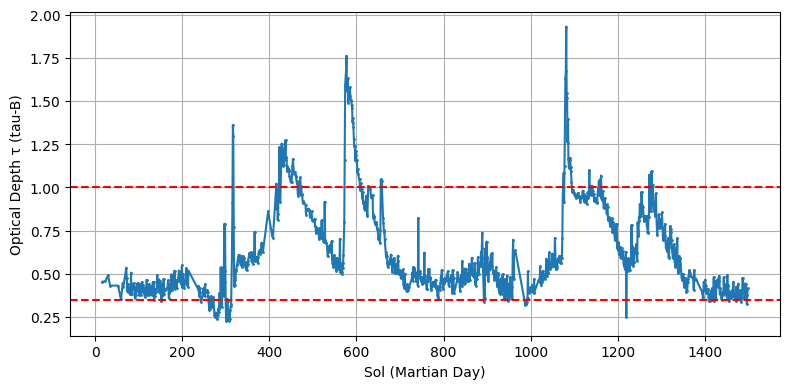

In [ ]:
"""
Script: plot_tau_vs_sol.py

Purpose
-------
Loads Mastcam-Z (or similar) optical depth data (tau-B column), computes the
mean optical depth per Sol (Martian day), and plots tau vs. Sol. The plot also
adds two dashed reference lines (default: tau = 0.35 and tau = 1.0) used as
context bounds in the manuscript.

Environment
-----------
Works in Google Colab / Jupyter or any Python environment with:
  - pandas
  - matplotlib

Output
------
Saves:
  - tau_vs_sol.svg
Prints:
  - basic stats and the per-sol mean tau list
"""

import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO


# ============================================================
# 1) Paste your CSV data below (including the header row).
#    If your data is in a file instead, use:
#      df = pd.read_csv("your_file.csv")
# ============================================================
DATA_CSV = """\
Eye,Type,Sol,LTST,SCLK_L,Sequence,FL,Sol,L_s,tau-B,tau-G,tau-R,tau-I,sig-B,sig-G,sig-R,sig-I,SZA,Interval
"""  # <-- Paste rows under this header


# ============================================================
# 2) Load data
# ============================================================
df = pd.read_csv(StringIO(DATA_CSV), skipinitialspace=True, engine="python")

# Some exports contain two "Sol" columns; pandas renames duplicates to Sol.1
sol_col = "Sol.1" if "Sol.1" in df.columns else "Sol"

# Convert to numeric (invalid values become NaN)
df["sol_float"] = pd.to_numeric(df[sol_col], errors="coerce")
df["tau_B"] = pd.to_numeric(df.get("tau-B"), errors="coerce")

# Keep only valid rows
df = df.dropna(subset=["sol_float", "tau_B"])
df = df[df["tau_B"].between(0, 3)]  # reasonable bound for optical depth

# ============================================================
# 3) Average tau per integer Sol
# ============================================================
df["sol_int"] = df["sol_float"].astype(int)

avg = (
    df.groupby("sol_int", as_index=False)["tau_B"]
      .mean()
      .rename(columns={"tau_B": "tau"})
)

# ============================================================
# 4) Print quick stats (useful for debugging / reporting)
# ============================================================
tau_values = avg["tau"].round(3).tolist()
print("Mean tau per Sol =", tau_values)
print(f"Sol range: {avg['sol_int'].min()}–{avg['sol_int'].max()}")
print(f"Tau range (mean per Sol): {avg['tau'].min():.3f}–{avg['tau'].max():.3f}")


# ============================================================
# 5) Plot
# ============================================================
def add_horizontal_lines(values, linestyle="--", linewidth=1.5):
    """Add horizontal reference lines to the current axes."""
    for v in values:
        plt.axhline(y=v, linestyle=linestyle, linewidth=linewidth)


plt.figure(figsize=(8, 4))
plt.plot(avg["sol_int"], avg["tau"], marker="o", markersize=2, linewidth=1)

plt.xlabel("Sol (Martian day)")
plt.ylabel("Optical depth τ (tau-B)")
plt.grid(True)

# Reference bounds used in the manuscript (edit if needed)
add_horizontal_lines([0.35, 1.0])

plt.tight_layout()
plt.savefig("tau_vs_sol.svg", format="svg", bbox_inches="tight")
plt.show()